In [2]:
# #Import all the necessary python libraries
# import os
# import pandas as pd
# import numpy as np

# import json
# import pymzml
# import csv
# import re
# from tqdm import tqdm

# import warnings

# import plotly.graph_objs as go
# from scipy.integrate import trapz
# import matplotlib.pyplot as plt
# from sklearn.mixture import GaussianMixture


# #######################################
# ### FIX AND DOUBLE CHECK LATER#######
# #################################
# #CLAW made directories 
# import create_directory
# import CLAW
# import OzESI_CLAW
# # import OzESI
# # import OzESI_plot
# # import OzESI_compare

# #version 2
# import OzESI
# from OzESI_plot import Plot
# # Import the create_folder function from OzESI_utils
# from OzESI_utils import create_folder, create_base_directory, generate_filename, save_for_ozone_compare, create_project_folder, filter_o3mzml_files, create_all_folders
# from OzESI_compare import OzoneCompare

# # Suppress all warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)



# Set Directories to load and save

In [2]:


# # Define the mode: 'ON' or 'OFF'
# mode = 'ON'  # Change to 'ON' as needed

# # Project Directory
# project = './Projects/'

# # Project Name
# project_name = 'AMP' #name of project
# project_data_name = 'AMP' #name of data from project

# project_folder_data = f'{project}{project_name}/AMP_ON/'
# project_results_folder = f'{project}{project_name}/results/'

# #mzML Data
# mzml_data = f'{project}{project_name}/mzml/AMP_ON/' #mzML Parse

# #CSV Data
# csv_data_folder = f'{project_results_folder}csv_data/'


# grouped_data_csv = f"{csv_data_folder}{project_data_name}_LipidGrouper_{mode}.csv" # Save RawDataParser output CSV file
# matched_data_csv = f"{csv_data_folder}{project_data_name}_MatchedData_{mode}.csv" # Save MatchedData output CSV file
# peak_analysis_csv = f"{csv_data_folder}{project_data_name}_PeakAnalysis_{mode}.csv" # Path to the PeakAnalysis output CSV file


# #plot data
# plots_directory = f'Projects/{project_name}/results/{project_data_name}/plots/on/'

# #Database Locations
# OzON_database = 'lipid_database/OzON_databases/OzON_Possible_Database.csv' ##double check this is right
# OzOFF_database = f'{csv_data_folder}{project_name}_OzOFF_possible.csv'



# # Define all necessary folder paths
# folders_to_create = [
#     csv_data_folder,
#     plots_directory,
#     project_results_folder,
#     plots_directory
# ]

# # Call the function to ensure all folders exist
# create_all_folders(*folders_to_create)



Folder already exists: ./Projects/AMP/results/csv_data/
Folder already exists: Projects/AMP/results/AMP/plots/on/
Folder already exists: ./Projects/AMP/results/
Folder already exists: Projects/AMP/results/AMP/plots/on/


# Imports

In [10]:
import pandas as pd

### MZML PARSER run on backend 
Step 1

In [2]:
# Submit the SLURM job for mzml_parser_1.sh
!sbatch core/backend/mzml_parser_1.sh


Submitted batch job 18318098


In [12]:
transition_summed_df = pd.read_parquet('df_transition_summed.parquet')
transition_summed_df.head()

,Parent_Ion,Product_Ion,Intensity,Transition,Sample_ID
0,227.1,183.0,128625.429199,227.1 -> 183.0,11162023_Blank-AMP_2x_MRMs_O3on_01
1,241.1,183.0,94654.506634,241.1 -> 183.0,11162023_Blank-AMP_2x_MRMs_O3on_01
2,255.2,183.0,160096.651577,255.2 -> 183.0,11162023_Blank-AMP_2x_MRMs_O3on_01
3,269.1,183.0,149254.590614,269.1 -> 183.0,11162023_Blank-AMP_2x_MRMs_O3on_01
4,283.2,183.0,479790.393131,283.2 -> 183.0,11162023_Blank-AMP_2x_MRMs_O3on_01


In [14]:
df_mzml_parser_1 = pd.read_parquet('df_mzml_parser_1.parquet')
df_mzml_parser_1

,Lipid,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition
0,None,227.1,183.0,0.011583,40.640003,11162023_Blank-AMP_2x_MRMs_O3on_01,227.1 -> 183.0
1,None,227.1,183.0,0.024483,40.680004,11162023_Blank-AMP_2x_MRMs_O3on_01,227.1 -> 183.0
2,None,227.1,183.0,0.037383,40.640003,11162023_Blank-AMP_2x_MRMs_O3on_01,227.1 -> 183.0
3,None,227.1,183.0,0.050317,40.640003,11162023_Blank-AMP_2x_MRMs_O3on_01,227.1 -> 183.0
4,None,227.1,183.0,0.063233,40.640003,11162023_Blank-AMP_2x_MRMs_O3on_01,227.1 -> 183.0
...,...,...,...,...,...,...,...
5121228,None,533.5,183.0,29.949033,41.620003,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0
5121229,None,533.5,183.0,29.961967,41.600002,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0
5121230,None,533.5,183.0,29.974883,41.540005,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0
5121231,None,533.5,183.0,29.987800,41.480003,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0


# Import the 3 DFs A = OzOFF possibile, B = OzON Database, C = OzON Data

In [7]:
import pandas as pd
# OzON_database = pd.read_csv('lipid_database/OzON_databases/OzON_Possible_Database_0.csv')
# OzON_database.to_parquet('lipid_database/OzON_databases/OzON_Possible_Database_0.parquet')


# # Import CSV files
OzOFF_database = pd.read_csv('Projects/AMP/results/csv_data/OzOFF_Possible_species.csv')
#OzOFF_database = OzOFF_database.iloc[1000:1005]  # Keep only 5 rows for development
# # Save as parquet files with the same names and directories
OzOFF_database.to_parquet('Projects/AMP/results/csv_data/OzOFF_Possible_species.parquet')


# Import parquet files
OzOFF_database = pd.read_parquet('Projects/AMP/results/csv_data/OzOFF_Possible_species.parquet')

OzON_database = pd.read_parquet('lipid_database/OzON_databases/OzON_Possible_Database_0.parquet')

# Note: The OzESI_df is not used in this code as per your instructions

In [17]:
# Assuming OzOFF_database is your DataFrame
# Display the first few rows of OzOFF_database
print(OzOFF_database.head())

# Keep only the first 5 rows
################ DO THIS TO MAKE DEVELOP GO MUST FASTER, REMOVE AFTER DEVELOPMENT DONE
# OzOFF_database = OzOFF_database.iloc[:21]

# Display the updated DataFrame to verify
OzOFF_database #A


                                           Sample_ID Lipid  Retention_Time  \
0  11162023_Blank-AMP_2x_MRMs_O3off_01_nan_nan_na...  10:0            4.05   
1  11162023_Blank-AMP_2x_MRMs_O3off_01_nan_nan_na...  11:0            4.36   
2  11162023_Blank-AMP_2x_MRMs_O3off_01_nan_nan_na...  12:0            4.81   
3  11162023_Blank-AMP_2x_MRMs_O3off_01_nan_nan_na...  13:0            5.31   
4  11162023_Blank-AMP_2x_MRMs_O3off_01_nan_nan_na...  14:0            6.33   

  Species  OzESI_Intensity Sample  Retention_Time_Median  
0    10:0    163130.656250  Blank                   4.05  
1    11:0     28590.121094  Blank                   4.35  
2    12:0    277318.875000  Blank                   4.80  
3    13:0     21738.460938  Blank                   5.49  
4    14:0    832092.250000  Blank                   6.27  


,Sample_ID,Lipid,Retention_Time,Species,OzESI_Intensity,Sample,Retention_Time_Median
0,11162023_Blank-AMP_2x_MRMs_O3off_01_nan_nan_na...,10:0,4.05,10:0,1.631307e+05,Blank,4.05
1,11162023_Blank-AMP_2x_MRMs_O3off_01_nan_nan_na...,11:0,4.36,11:0,2.859012e+04,Blank,4.35
2,11162023_Blank-AMP_2x_MRMs_O3off_01_nan_nan_na...,12:0,4.81,12:0,2.773189e+05,Blank,4.80
3,11162023_Blank-AMP_2x_MRMs_O3off_01_nan_nan_na...,13:0,5.31,13:0,2.173846e+04,Blank,5.49
4,11162023_Blank-AMP_2x_MRMs_O3off_01_nan_nan_na...,14:0,6.33,14:0,8.320922e+05,Blank,6.27
...,...,...,...,...,...,...,...
1318,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,7:0,3.34,7:0,7.799356e+04,hippo_5xFAD_m2_FAD257,3.34
1319,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,8:0,3.60,8:0,2.943935e+05,hippo_5xFAD_m2_FAD257,3.60
1320,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,9:0,3.83,9:0,2.685991e+06,hippo_5xFAD_m2_FAD257,3.83
1321,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,9:1,3.71,9:1,5.000660e+03,hippo_5xFAD_m2_FAD257,3.71


In [16]:
OzON_database #B

,Lipid,Parent_Ion,Product_Ion,Species,Class,DB Location,FA mass,[FA+AMP]+
0,FA(5:0),269.3,183.0,5:0,FA,None,102.2,281.3
1,FA(6:0),283.3,183.0,6:0,FA,None,116.2,295.3
2,FA(6:1)_<>_n-2,269.2,183.0,6:1,FA,<>,114.1,281.2
3,FA(6:1)_<>_n-3,255.2,183.0,6:1,FA,<>,114.1,281.2
4,FA(6:1)_<>_n-4,241.2,183.0,6:1,FA,<>,114.1,281.2
...,...,...,...,...,...,...,...,...
6531,FA(30:6)_<BBFFF>_n-26,265.5,183.0,30:6,FA,<BBFFF>,440.4,607.5
6532,FA(30:6)_<FFFFF>_n-27,255.5,183.0,30:6,FA,<FFFFF>,440.4,607.5
6533,FA(30:6)_<BFFFF>_n-27,253.5,183.0,30:6,FA,<BFFFF>,440.4,607.5
6534,FA(30:6)_<FFFFF>_n-28,241.5,183.0,30:6,FA,<FFFFF>,440.4,607.5


In [15]:
df_mzml_parser_1 #C

,Lipid,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition
0,None,227.1,183.0,0.011583,40.640003,11162023_Blank-AMP_2x_MRMs_O3on_01,227.1 -> 183.0
1,None,227.1,183.0,0.024483,40.680004,11162023_Blank-AMP_2x_MRMs_O3on_01,227.1 -> 183.0
2,None,227.1,183.0,0.037383,40.640003,11162023_Blank-AMP_2x_MRMs_O3on_01,227.1 -> 183.0
3,None,227.1,183.0,0.050317,40.640003,11162023_Blank-AMP_2x_MRMs_O3on_01,227.1 -> 183.0
4,None,227.1,183.0,0.063233,40.640003,11162023_Blank-AMP_2x_MRMs_O3on_01,227.1 -> 183.0
...,...,...,...,...,...,...,...
5121228,None,533.5,183.0,29.949033,41.620003,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0
5121229,None,533.5,183.0,29.961967,41.600002,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0
5121230,None,533.5,183.0,29.974883,41.540005,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0
5121231,None,533.5,183.0,29.987800,41.480003,11192023_5xFAD-m2-hippo-FAD257_AMP_2x_0.05uMd2...,533.5 -> 183.0


# Add Sample Column to OzESI_df

# Sample run on backend
step 2

In [14]:
# Submit the SLURM job for !sbatch core/backend/sample_2.sh
!sbatch core/backend/sample_2.sh


Submitted batch job 18287887


# MATCH LIPIDS

In [9]:
# Submit the SLURM job for !sbatch core/backend/match_3.sh
!sbatch core/backend/match_3.sh


Submitted batch job 18318243


# LipidGrouper group lipids by ion m/z and samples
step 4

In [59]:
!sbatch core/backend/group_4.sh

Submitted batch job 18293233


In [18]:
# read in group_4.parquet data
group_4 = pd.read_parquet('df_group_4.parquet')
#print unique columns
print(group_4.columns.unique())
group_4

Index(['Lipid', 'Parent_Ion', 'Product_Ion', 'Retention_Time',
       'OzESI_Intensity', 'Sample_ID', 'Transition', 'Sample', 'Species',
       'Class', 'Possible_Lipids', 'Biology', 'Genotype', 'Cage', 'Mouse',
       'group_by_ion', 'group_by_lipid'],
      dtype='object')


,Lipid,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Sample,Species,Class,Possible_Lipids,Biology,Genotype,Cage,Mouse,group_by_ion,group_by_lipid
0,FA(18:1)_<>_n-10,325.2,183.0,8.162467,84.0,11162023_Blank-AMP_2x_MRMs_O3on_01,325.2 -> 183.0,Blank,18:1,FA,FA(18:1)_<>_n-10 | FA(18:2)_<F>_n-10 | FA(18:3...,,,,,336,0
1,FA(18:1)_<>_n-10,325.2,183.0,8.175400,91.0,11162023_Blank-AMP_2x_MRMs_O3on_01,325.2 -> 183.0,Blank,18:1,FA,FA(18:1)_<>_n-10 | FA(18:2)_<F>_n-10 | FA(18:3...,,,,,336,0
2,FA(18:1)_<>_n-10,325.2,183.0,8.188317,89.0,11162023_Blank-AMP_2x_MRMs_O3on_01,325.2 -> 183.0,Blank,18:1,FA,FA(18:1)_<>_n-10 | FA(18:2)_<F>_n-10 | FA(18:3...,,,,,336,0
3,FA(18:1)_<>_n-10,325.2,183.0,8.201233,81.0,11162023_Blank-AMP_2x_MRMs_O3on_01,325.2 -> 183.0,Blank,18:1,FA,FA(18:1)_<>_n-10 | FA(18:2)_<F>_n-10 | FA(18:3...,,,,,336,0
4,FA(18:1)_<>_n-10,325.2,183.0,8.214150,53.0,11162023_Blank-AMP_2x_MRMs_O3on_01,325.2 -> 183.0,Blank,18:1,FA,FA(18:1)_<>_n-10 | FA(18:2)_<F>_n-10 | FA(18:3...,,,,,336,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217849,FA(18:3)_<FF>_n-9,339.3,183.0,4.570200,310.0,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,339.3 -> 183.0,WT_m5_hippo_FAD263,18:3,FA,FA(18:1)_<>_n-9 | FA(18:2)_<F>_n-9 | FA(18:3)_...,hippo,WT,FAD263,m5,445,2746
217850,FA(18:3)_<FF>_n-9,339.3,183.0,4.583133,244.0,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,339.3 -> 183.0,WT_m5_hippo_FAD263,18:3,FA,FA(18:1)_<>_n-9 | FA(18:2)_<F>_n-9 | FA(18:3)_...,hippo,WT,FAD263,m5,445,2746
217851,FA(18:3)_<FF>_n-9,339.3,183.0,4.596050,174.0,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,339.3 -> 183.0,WT_m5_hippo_FAD263,18:3,FA,FA(18:1)_<>_n-9 | FA(18:2)_<F>_n-9 | FA(18:3)_...,hippo,WT,FAD263,m5,445,2746
217852,FA(18:3)_<FF>_n-9,339.3,183.0,4.608967,137.0,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,339.3 -> 183.0,WT_m5_hippo_FAD263,18:3,FA,FA(18:1)_<>_n-9 | FA(18:2)_<F>_n-9 | FA(18:3)_...,hippo,WT,FAD263,m5,445,2746


# after updated grouping ti should be sorted by RT

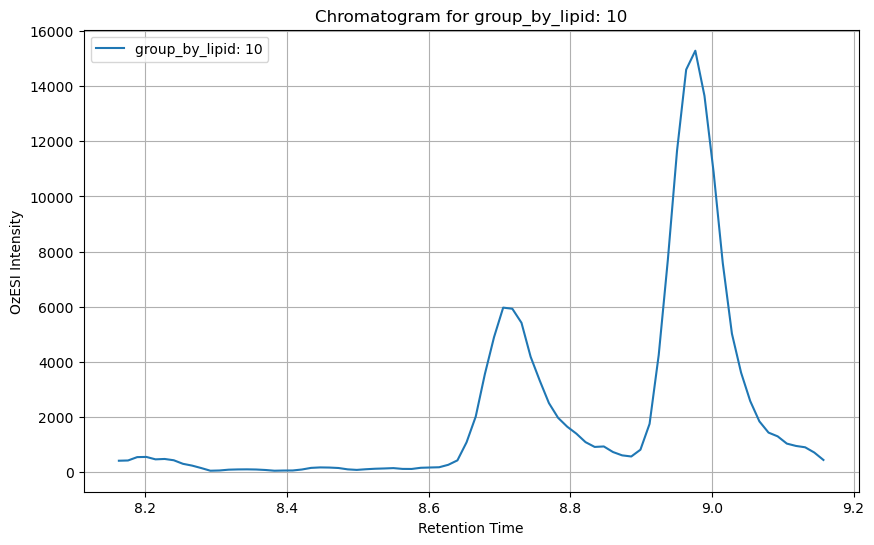

In [20]:
import matplotlib.pyplot as plt

# Function to plot the chromatogram for a specific group_by_lipid value
def plot_chromatogram(df, group_value):
    group_data = df[df['group_by_lipid'] == group_value]
    
    # Ensure the Retention_Time is sorted
    group_data = group_data.sort_values(by='Retention_Time')
    
    plt.figure(figsize=(10, 6))
    plt.plot(group_data['Retention_Time'], group_data['OzESI_Intensity'], label=f'group_by_lipid: {group_value}')
    plt.xlabel('Retention Time')
    plt.ylabel('OzESI Intensity')
    plt.title(f'Chromatogram for group_by_lipid: {group_value}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define the specific group_by_lipid value you are interested in
specific_group_by_lipid_value = 10  # Replace with the actual value you are interested in

# Call the function to plot the chromatogram
plot_chromatogram(group_4, specific_group_by_lipid_value)


# Analysis Step 5
## Find peaks in Lipid chromatogram data

In [21]:
!sbatch core/backend/analysis_5.sh

Submitted batch job 18317970


In [22]:
test_4 = pd.read_parquet('df_group_4.parquet')
#print unique columns 
print(test_4.columns.unique())
test_4

Index(['Lipid', 'Parent_Ion', 'Product_Ion', 'Retention_Time',
       'OzESI_Intensity', 'Sample_ID', 'Transition', 'Sample', 'Species',
       'Class', 'Possible_Lipids', 'Biology', 'Genotype', 'Cage', 'Mouse',
       'group_by_ion', 'group_by_lipid'],
      dtype='object')


,Lipid,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Sample,Species,Class,Possible_Lipids,Biology,Genotype,Cage,Mouse,group_by_ion,group_by_lipid
0,FA(18:1)_<>_n-10,325.2,183.0,8.162467,84.0,11162023_Blank-AMP_2x_MRMs_O3on_01,325.2 -> 183.0,Blank,18:1,FA,FA(18:1)_<>_n-10 | FA(18:2)_<F>_n-10 | FA(18:3...,,,,,336,0
1,FA(18:1)_<>_n-10,325.2,183.0,8.175400,91.0,11162023_Blank-AMP_2x_MRMs_O3on_01,325.2 -> 183.0,Blank,18:1,FA,FA(18:1)_<>_n-10 | FA(18:2)_<F>_n-10 | FA(18:3...,,,,,336,0
2,FA(18:1)_<>_n-10,325.2,183.0,8.188317,89.0,11162023_Blank-AMP_2x_MRMs_O3on_01,325.2 -> 183.0,Blank,18:1,FA,FA(18:1)_<>_n-10 | FA(18:2)_<F>_n-10 | FA(18:3...,,,,,336,0
3,FA(18:1)_<>_n-10,325.2,183.0,8.201233,81.0,11162023_Blank-AMP_2x_MRMs_O3on_01,325.2 -> 183.0,Blank,18:1,FA,FA(18:1)_<>_n-10 | FA(18:2)_<F>_n-10 | FA(18:3...,,,,,336,0
4,FA(18:1)_<>_n-10,325.2,183.0,8.214150,53.0,11162023_Blank-AMP_2x_MRMs_O3on_01,325.2 -> 183.0,Blank,18:1,FA,FA(18:1)_<>_n-10 | FA(18:2)_<F>_n-10 | FA(18:3...,,,,,336,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217849,FA(18:3)_<FF>_n-9,339.3,183.0,4.570200,310.0,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,339.3 -> 183.0,WT_m5_hippo_FAD263,18:3,FA,FA(18:1)_<>_n-9 | FA(18:2)_<F>_n-9 | FA(18:3)_...,hippo,WT,FAD263,m5,445,2746
217850,FA(18:3)_<FF>_n-9,339.3,183.0,4.583133,244.0,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,339.3 -> 183.0,WT_m5_hippo_FAD263,18:3,FA,FA(18:1)_<>_n-9 | FA(18:2)_<F>_n-9 | FA(18:3)_...,hippo,WT,FAD263,m5,445,2746
217851,FA(18:3)_<FF>_n-9,339.3,183.0,4.596050,174.0,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,339.3 -> 183.0,WT_m5_hippo_FAD263,18:3,FA,FA(18:1)_<>_n-9 | FA(18:2)_<F>_n-9 | FA(18:3)_...,hippo,WT,FAD263,m5,445,2746
217852,FA(18:3)_<FF>_n-9,339.3,183.0,4.608967,137.0,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,339.3 -> 183.0,WT_m5_hippo_FAD263,18:3,FA,FA(18:1)_<>_n-9 | FA(18:2)_<F>_n-9 | FA(18:3)_...,hippo,WT,FAD263,m5,445,2746


In [27]:
test_5 = pd.read_parquet('df_analysis_5.parquet')
#print unique columns
print(test_5.columns.unique())
test_5

Index(['Lipid', 'Retention_Time', 'OzESI_Intensity', 'group_by_ion',
       'group_by_lipid', 'Sample_ID', 'Transition', 'Sample', 'Parent_Ion',
       'Product_Ion', 'Species', 'Class', 'Possible_Lipids', 'Biology',
       'Genotype', 'Cage', 'Mouse', 'Peak_Height', 'FWHM', 'Peak_Width',
       'Peak_Area', 'Filter_Column', 'n_value'],
      dtype='object')


,Lipid,Retention_Time,OzESI_Intensity,group_by_ion,group_by_lipid,Sample_ID,Transition,Sample,Parent_Ion,Product_Ion,...,Biology,Genotype,Cage,Mouse,Peak_Height,FWHM,Peak_Width,Peak_Area,Filter_Column,n_value
0,FA(18:1)_<>_n-2,8.480583,2077.0,1202,288,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,437.4 -> 183.0,5xFAD_m1_cereb_FAD231,437.4,183.0,...,cereb,5xFAD,FAD231,m1,2077.0,0.065651,0.064600,134.174200,group_by_lipid,2
1,FA(18:1)_<>_n-2,8.816517,115149.0,1202,288,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,437.4 -> 183.0,5xFAD_m1_cereb_FAD231,437.4,183.0,...,cereb,5xFAD,FAD231,m1,115149.0,0.120640,0.116283,13389.909550,group_by_lipid,2
2,FA(18:1)_<>_n-2,9.113683,132645.0,1202,288,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,437.4 -> 183.0,5xFAD_m1_cereb_FAD231,437.4,183.0,...,cereb,5xFAD,FAD231,m1,132645.0,0.044202,0.038767,5142.204500,group_by_lipid,2
3,FA(18:1)_<>_n-2,8.467650,9272.0,1203,289,11192023_5xFAD-m1-cereb-FAD249_AMP_2x_0.05uMd2...,437.4 -> 183.0,5xFAD_m1_cereb_FAD249,437.4,183.0,...,cereb,5xFAD,FAD249,m1,9272.0,0.088852,0.090433,838.497867,group_by_lipid,2
4,FA(18:1)_<>_n-2,8.751900,1519163.0,1203,289,11192023_5xFAD-m1-cereb-FAD249_AMP_2x_0.05uMd2...,437.4 -> 183.0,5xFAD_m1_cereb_FAD249,437.4,183.0,...,cereb,5xFAD,FAD249,m1,1519163.0,0.130759,0.129217,196301.178983,group_by_lipid,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3001,FA(18:3)_<BF>_n-10,3.808500,1289.0,317,1834,11162023_WT-m5-dienc-FAD263_AMP_2x_0.05uMd216-...,323.2 -> 183.0,WT_m5_dienc_FAD263,323.2,183.0,...,dienc,WT,FAD263,m5,1289.0,0.049294,0.038767,49.970233,group_by_lipid,10
3002,FA(18:3)_<BF>_n-10,3.705167,3859.0,318,1843,11162023_WT-m5-hippo-FAD259_AMP_2x_0.05uMd216-...,323.2 -> 183.0,WT_m5_hippo_FAD259,323.2,183.0,...,hippo,WT,FAD259,m5,3859.0,0.057869,0.064600,249.291400,group_by_lipid,10
3003,FA(18:3)_<BF>_n-10,3.808533,1680.0,318,1843,11162023_WT-m5-hippo-FAD259_AMP_2x_0.05uMd216-...,323.2 -> 183.0,WT_m5_hippo_FAD259,323.2,183.0,...,hippo,WT,FAD259,m5,1680.0,0.049338,0.051683,86.828000,group_by_lipid,10
3004,FA(18:3)_<FF>_n-11,3.808717,1392.0,279,2216,11192023_5xFAD-m1-cereb-FAD249_AMP_2x_0.05uMd2...,311.3 -> 183.0,5xFAD_m1_cereb_FAD249,311.3,183.0,...,cereb,5xFAD,FAD249,m1,1392.0,0.047919,0.051683,71.943200,group_by_lipid,11


# Analysis PLOT update

In [4]:
# import os
# import pandas as pd
# import matplotlib.pyplot as plt
# from scipy.signal import find_peaks, peak_widths

# class Plot:
#     def __init__(self, raw_data_file, analyzed_data_file):
#         self.raw_data = pd.read_parquet(raw_data_file)
#         self.analyzed_data = pd.read_parquet(analyzed_data_file)

#     def plot_peaks(self, project_results=None, file_name_to_save=None):
#         unique_lipids = self.analyzed_data['Lipid'].unique()

#         for lipid in unique_lipids:
#             lipid_data = self.analyzed_data[self.analyzed_data['Lipid'] == lipid]
#             plt.figure(figsize=(10, 6))

#             plt.plot(lipid_data['Retention_Time'], lipid_data['OzESI_Intensity'], label='Intensity')
#             plt.scatter(lipid_data['Retention_Time'], lipid_data['OzESI_Intensity'], color='red')

#             for _, row in lipid_data.iterrows():
#                 plt.annotate(f"Peak Height: {row['Peak_Height']:.2f}\nFWHM: {row['FWHM']:.2f}\nArea: {row['Peak_Area']:.2f}",
#                              (row['Retention_Time'], row['OzESI_Intensity']),
#                              textcoords="offset points",
#                              xytext=(0, 10),
#                              ha='center')

#             plt.title(f"Peaks for Lipid: {lipid}")
#             plt.xlabel('Retention Time')
#             plt.ylabel('OzESI Intensity')
#             plt.legend()
#             plt.grid(True)

#             if project_results and file_name_to_save:
#                 plot_folder = f'{project_results}plots/'
#                 os.makedirs(plot_folder, exist_ok=True)
#                 sample_name = lipid_data['Sample'].iloc[0]
#                 plt.savefig(f"{plot_folder}{file_name_to_save}_{sample_name}_{lipid}_peaks.png")
#             plt.show()
#             plt.close()

#     def plot_data_and_peaks(self, group_type, group_value, height=1000, width=None, rel_height=0.5):
#         if group_type not in ['group_by_ion', 'group_by_lipid']:
#             raise ValueError(f"group_type must be 'group_by_ion' or 'group_by_lipid'")

#         if group_type not in self.raw_data.columns:
#             raise ValueError(f"group_type '{group_type}' is not a valid column in the data")

#         group_data = self.raw_data[self.raw_data[group_type] == group_value]
#         peaks, properties = find_peaks(group_data['OzESI_Intensity'], height=height, width=width)
#         results_half = peak_widths(group_data['OzESI_Intensity'], peaks, rel_height=rel_height)

#         plt.figure(figsize=(10, 6))
#         plt.plot(group_data['Retention_Time'], group_data['OzESI_Intensity'], label='Intensity')
#         plt.scatter(group_data['Retention_Time'].iloc[peaks], group_data['OzESI_Intensity'].iloc[peaks], color='red')

#         for i, peak in enumerate(peaks):
#             left_ip = results_half[2][i]
#             right_ip = results_half[3][i]
#             left_time = group_data['Retention_Time'].iloc[int(left_ip)]
#             right_time = group_data['Retention_Time'].iloc[int(right_ip)]
#             width_in_time = right_time - left_time

#             fwhm = results_half[0][i] * (group_data['Retention_Time'].values[1] - group_data['Retention_Time'].values[0])

#             plt.annotate(
#                 f"Peak Height: {properties['peak_heights'][i]:.2f}\nFWHM: {fwhm:.2f}\nArea: {properties['peak_heights'][i] * width_in_time:.2f}",
#                 (group_data['Retention_Time'].iloc[peak], group_data['OzESI_Intensity'].iloc[peak]),
#                 textcoords="offset points",
#                 xytext=(0, 10),
#                 ha='center'
#             )

#         if group_type == 'group_by_lipid':
#             lipid_value = group_data['Lipid'].iloc[0] if 'Lipid' in group_data.columns else 'Unknown'
#             sample_name = group_data['Sample'].iloc[0] if 'Sample' in group_data.columns else 'Unknown'
#             plot_title = f"Lipid: {lipid_value} (Sample: {sample_name})"
#         else:  # group_type == 'group_by_ion'
#             parent_ion_value = group_data['Parent_Ion'].iloc[0] if 'Parent_Ion' in group_data.columns else 'Unknown'
#             plot_title = f"Parent Ion: {parent_ion_value}"

#         plt.title(f"Peaks for {plot_title}")
#         plt.xlabel('Retention Time')
#         plt.ylabel('OzESI Intensity')
#         plt.legend()
#         plt.grid(True)
#         plt.show()

# # Example usage:
# # plotter = Plot("df_group_4.parquet", "df_analysis_5.parquet")
# # plotter.plot_peaks(project_results="./results/", file_name_to_save="lipid_analysis")
# # plotter.plot_data_and_peaks(group_type='group_by_lipid', group_value='some_group_value', height=1000, width=1, rel_height=0.5)


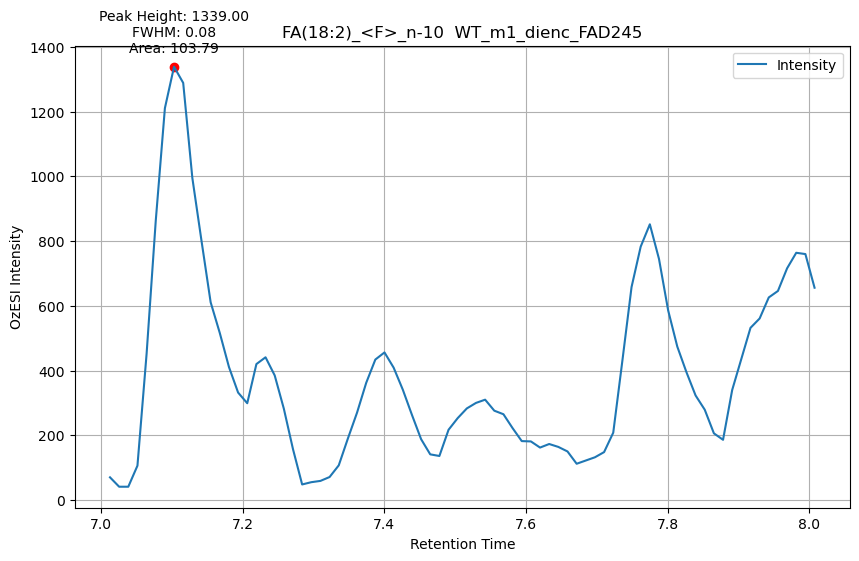

In [24]:
from core.python.plot_analysis_6 import Plot
# Initialize the Plot class with the raw data and analyzed peaks files
plotter = Plot("df_group_4.parquet", "df_analysis_5.parquet")

# # Plot peaks for each lipid
# plotter.plot_peaks(project_results="./results/", file_name_to_save="lipid_analysis")

# Plot data and peaks for a specific group
group_type = 'group_by_lipid'  # or 'group_by_ion'
group_value = 1009  # Replace with the actual group value you want to plot
plotter.plot_data_and_peaks(group_type, group_value, height=1000, width=1, rel_height=0.5)


# Plot Results 

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import re

class Plot:
    def __init__(self, dataframe):
        # Initialize the class with the provided dataframe
        self.dataframe = dataframe

    def extract_fa_n_values(self, text):
        """Extract FA and n-value from a string."""
        # Use regular expressions to find the FA(##:#) pattern
        fa_match = re.search(r'FA\((\d+:\d+)\)', str(text))
        # Use regular expressions to find the n-# pattern
        n_match = re.search(r'n-(\d+)', str(text))
        # Extract the FA value if found, otherwise default to '0:0'
        fa_value = fa_match.group(1) if fa_match else '0:0'
        # Extract the n value as an integer if found, otherwise default to 0
        n_value = int(n_match.group(1)) if n_match else 0
        # Return both extracted values as a tuple
        return fa_value, n_value

    def scatter(self):
        """Create scatter plots of Peak_Area by Lipid for each unique Biology and save as PNG."""
        # Filter the dataframe to keep only rows with positive Peak_Area and drop rows with NaN in Peak_Area
        filtered_df = self.dataframe[self.dataframe['Peak_Area'] > 0].dropna(subset=['Peak_Area'])

        if filtered_df.empty:
            # If the filtered dataframe is empty, print a message and exit the function
            print("No lipids with peak areas found. Scatter plots will not be displayed.")
            return

        # Get unique Biology values from the dataframe
        biology_values = filtered_df['Biology'].unique()
        print(f"Unique Biology values: {biology_values}")

        # Iterate through each unique Biology value
        for biology in tqdm(biology_values, desc="Creating scatter plots"):
            # Filter the dataframe for the current Biology value
            biology_df = filtered_df[filtered_df['Biology'] == biology]
            
            # Group the filtered dataframe by Lipid
            grouped = biology_df.groupby('Lipid')

            # Create a new figure for the scatter plot
            fig, ax = plt.subplots(figsize=(14, 14))
            # Generate a list of colors to use for the scatter plot
            colors = plt.cm.tab20.colors * (len(grouped) // len(plt.cm.tab20.colors) + 1)

            # Sort the lipid keys first by FA value and then by n value
            lipid_keys = sorted(grouped.groups.keys(), key=lambda x: (self.extract_fa_n_values(x)[0], self.extract_fa_n_values(x)[1]))

            # Iterate through each lipid key and its corresponding color
            for key, color in zip(lipid_keys, colors):
                # Get the group of rows corresponding to the current lipid key
                group = grouped.get_group(key)
                # Create a scatter plot for the current lipid key
                ax.scatter(group['Lipid'], group['Peak_Area'], label=str(key), color=color, s=100)

            # Set the x-axis label
            ax.set_xlabel('Lipid')
            # Set the y-axis label
            ax.set_ylabel('Peak Area')
            # Set the title of the plot
            ax.set_title(f'Peak Area by Lipid (Biology: {biology})')
            # Set the x-ticks to correspond to the sorted lipid keys
            ax.set_xticks([i for i, _ in enumerate(lipid_keys)])
            # Set the x-tick labels to the sorted lipid keys, rotating them vertically
            ax.set_xticklabels(lipid_keys, rotation='vertical')

            # # Print the x-tick labels for the 'cereb' Biology value
            # if biology == 'cereb':
            #     print(f"Biology: {biology}")
            #     for i, lipid in enumerate(lipid_keys):
            #         print(f"X-tick {i}: {lipid}")

            # Add a legend to the plot
            ax.legend(title='Sample', bbox_to_anchor=(1.05, 1), loc='upper left')
            
            # Save the plot as a PNG file with a filename based on the Biology value
            filename = f'Peak_Area_by_Lipid_{biology}.png'
            plt.savefig(filename)
            # Close the figure to free up memory
            plt.close(fig)

# Example usage
# Assuming `test_5` is your DataFrame
plotter = Plot(dataframe=test_5)
plotter.scatter()


Unique Biology values: ['cereb' 'cortex' 'dienc' 'hippo' '']


Creating scatter plots: 100%|██████████| 5/5 [00:06<00:00,  1.39s/it]
